In [59]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('car-data.csv')

# Select relevant columns


In [15]:
df.shape

(23906, 16)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [14]:
df.drop_duplicates(keep ='last')
df.shape

(23906, 16)

In [37]:
df.describe()

,Annual Income,Price ($)
count,23906.000000,23906.000000
mean,830.840285,28.090248
std,720.006395,14.788688
min,10.080000,1.200000
25%,386.000000,18.001000
50%,735.000000,23.000000
75%,1175.750000,34.000000
max,11200.000000,85.800000


In [17]:
df['Annual Income']/=1000

In [19]:
df['Price ($)']/=1000

In [36]:
df.head(10)

,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region
0,1/2/2022,Male,13.5,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26.0,SUV,Middletown
1,1/2/2022,Male,1480.0,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19.0,SUV,Aurora
2,1/2/2022,Male,1035.0,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31.5,Passenger,Greenville
3,1/2/2022,Male,13.5,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14.0,SUV,Pasco
4,1/2/2022,Male,1465.0,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24.5,Hatchback,Janesville
5,1/2/2022,Male,850.0,Classic Chevy,Mitsubishi,Diamante,Overhead Camshaft,Manual,Pale White,12.0,Hatchback,Scottsdale
6,1/2/2022,Male,1600.0,Clay Johnson Auto Sales,Toyota,Corolla,Overhead Camshaft,Manual,Pale White,14.0,Passenger,Austin
7,1/2/2022,Male,13.5,U-Haul CO,Mitsubishi,Galant,Double Overhead Camshaft,Auto,Pale White,42.0,Passenger,Austin
8,1/2/2022,Male,815.0,Rabun Used Car Sales,Chevrolet,Malibu,Overhead Camshaft,Manual,Pale White,82.0,Hardtop,Pasco
9,1/2/2022,Female,13.5,Rabun Used Car Sales,Ford,Escort,Double Overhead Camshaft,Auto,Pale White,15.0,Passenger,Scottsdale


In [23]:
single_value_columns = [col for col in df.columns if df[col].nunique() == 1]
single_value_columns

[]

In [33]:
irrelevant_columns = ['Dealer_No ', 'Phone','Customer Name']

In [34]:
df = df.drop(columns=irrelevant_columns)

In [46]:

categorical_columns=['Gender',
 'Engine',
 'Transmission',
 'Color',
 'Body Style'
 ]

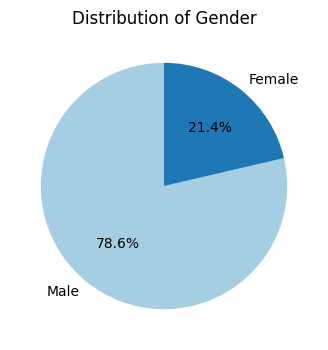

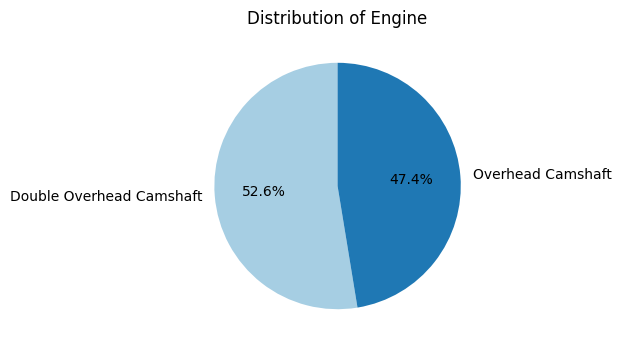

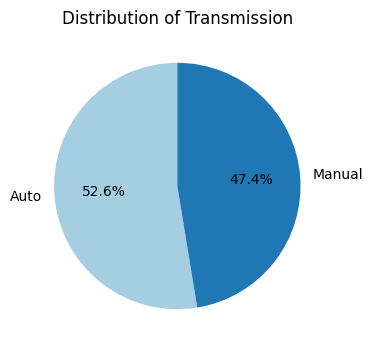

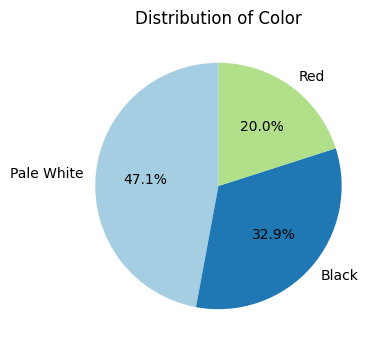

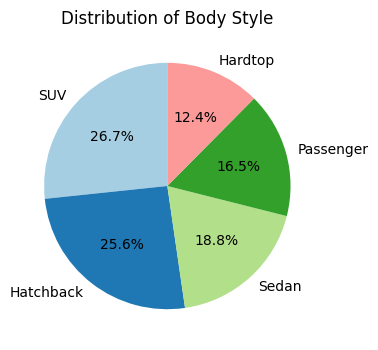

In [49]:
for col in categorical_columns:
    plt.figure(figsize=(4, 4))
    
    # Count the unique values in the column
    value_counts = df[col].value_counts()
    
    # Plot the pie chart
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f'Distribution of {col}')
    
    # Display the chart
    plt.show()

In [58]:
X = df[['Annual Income', 'Price ($)']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_curve.png')
plt.close()

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Summarize customer segments
segment_summary = df.groupby('Cluster').agg({
    'Annual Income': 'mean',
    'Price ($)': 'mean',
    'Gender': lambda x: x.value_counts().index[0],
    'Company': lambda x: x.value_counts().index[0],
    'Model': lambda x: x.value_counts().index[0],
    'Transmission': lambda x: x.value_counts().index[0],
    'Color': lambda x: x.value_counts().index[0],
    'Body Style': lambda x: x.value_counts().index[0]
}).round(2)

print(segment_summary)

# Save segment summary for Tableau
segment_summary.to_csv('segment_summary.csv')

# Prepare data for Tableau
df[['Cluster','Gender', 'Annual Income', 'Price ($)', 'Company', 'Model', 'Transmission', 'Color', 'Body Style']].to_csv('tableau_data.csv', index=False)

# Generate some visualizations for quick insights
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Annual Income', y='Price ($)', hue='Cluster', palette='viridis')
plt.title('Customer Segments: Annual Income vs Car Price')
plt.savefig('income_vs_price_scatter.png')
plt.close()

plt.figure(figsize=(10,6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.savefig('gender_distribution.png')
plt.close()

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Body Style', hue='Gender')
plt.title('Body Style Preference by Gender')
plt.xticks(rotation=45)
plt.savefig('body_style_preference.png')
plt.close()

         Annual Income  Price ($) Gender    Company          Model  \
Cluster                                                              
0               512.56      21.16   Male  Chevrolet         Passat   
1               692.31      51.49   Male       Ford  Montero Sport   
2              1815.72      23.93   Male      Dodge       Diamante   

        Transmission       Color Body Style  
Cluster                                      
0               Auto  Pale White        SUV  
1               Auto  Pale White      Sedan  
2               Auto  Pale White  Hatchback  


In [ ]:
customer_data = df[['Customer Name', 'Gender', 'Annual Income', 'Model', 'Price ($)']]

# Encode gender to numeric for clustering
customer_data['Gender'] = customer_data['Gender'].map({'Male': 0, 'Female': 1})

# Handle missing values if necessary
customer_data = customer_data.dropna()

# Standardize income for clustering
scaler = StandardScaler()
customer_data['Annual Income Scaled'] = scaler.fit_transform(customer_data[['Annual Income']])


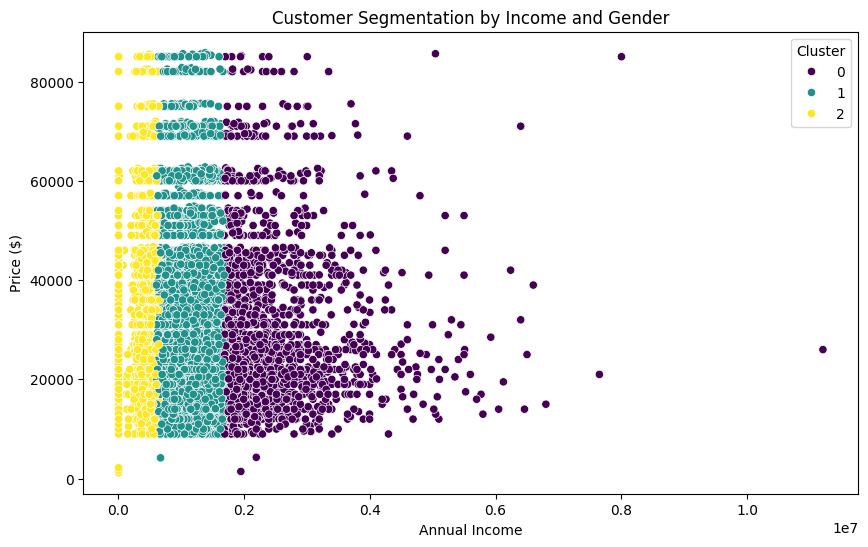

In [53]:
# Apply K-Means clustering (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data[['Annual Income Scaled', 'Gender']])

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', hue='Cluster', data=customer_data, palette='viridis')
plt.title('Customer Segmentation by Income and Gender')
plt.show()


Task 2


In [60]:
dealer_performance = df.groupby('Dealer_Name').agg({
    'Car_id': 'count',
    'Price ($)': ['sum', 'mean'],
    'Customer Name': 'nunique'
}).reset_index()

dealer_performance.columns = ['Dealer_Name', 'Total_Sales', 'Total_Revenue', 'Avg_Sale_Price', 'Unique_Customers']
dealer_performance['Revenue_per_Sale'] = dealer_performance['Total_Revenue'] / dealer_performance['Total_Sales']

# Calculate a performance score (you can adjust the weights as needed)
weights = {
    'Total_Sales': 0.3,
    'Total_Revenue': 0.3,
    'Avg_Sale_Price': 0.2,
    'Unique_Customers': 0.2
}

for metric in weights.keys():
    dealer_performance[f'{metric}_Normalized'] = (dealer_performance[metric] - dealer_performance[metric].min()) / (dealer_performance[metric].max() - dealer_performance[metric].min())

dealer_performance['Performance_Score'] = sum(dealer_performance[f'{metric}_Normalized'] * weight for metric, weight in weights.items())

# Rank dealers based on performance score
dealer_performance = dealer_performance.sort_values('Performance_Score', ascending=False).reset_index(drop=True)
dealer_performance['Rank'] = dealer_performance.index + 1

# Print top 10 performing dealers
print("Top 10 Performing Dealers:")
print(dealer_performance[['Rank', 'Dealer_Name', 'Performance_Score', 'Total_Sales', 'Total_Revenue', 'Avg_Sale_Price', 'Unique_Customers']].head(10))

# Regional analysis
regional_performance = df.groupby('Dealer_Region').agg({
    'Car_id': 'count',
    'Price ($)': ['sum', 'mean'],
    'Dealer_Name': 'nunique',
    'Customer Name': 'nunique'
}).reset_index()

regional_performance.columns = ['Region', 'Total_Sales', 'Total_Revenue', 'Avg_Sale_Price', 'Num_Dealers', 'Unique_Customers']
regional_performance['Revenue_per_Dealer'] = regional_performance['Total_Revenue'] / regional_performance['Num_Dealers']
regional_performance['Sales_per_Dealer'] = regional_performance['Total_Sales'] / regional_performance['Num_Dealers']

print("\nRegional Performance Summary:")
print(regional_performance)

# Save data for Tableau
dealer_performance.to_csv('dealer_performance.csv', index=False)
regional_performance.to_csv('regional_performance.csv', index=False)

# Generate some visualizations for quick insights
plt.figure(figsize=(12,6))
sns.scatterplot(data=dealer_performance.head(20), x='Total_Sales', y='Total_Revenue', size='Avg_Sale_Price', hue='Unique_Customers', palette='viridis')
plt.title('Top 20 Dealers: Sales vs Revenue')
plt.savefig('top_dealers_scatter.png')
plt.close()

plt.figure(figsize=(12,6))
sns.barplot(data=regional_performance, x='Region', y='Revenue_per_Dealer')
plt.title('Average Revenue per Dealer by Region')
plt.xticks(rotation=45)
plt.savefig('regional_revenue_per_dealer.png')
plt.close()

Top 10 Performing Dealers:
   Rank                                      Dealer_Name  Performance_Score  \
0     1                             Rabun Used Car Sales           0.958693   
1     2                                        U-Haul CO           0.944270   
2     3  Progressive Shippers Cooperative Association No           0.873104   
3     4                                    Race Car Help           0.861917   
4     5                Scrivener Performance Engineering           0.858029   
5     6                                 Saab-Belle Dodge           0.839166   
6     7                               Tri-State Mack Inc           0.833918   
7     8                             Star Enterprises Inc           0.832225   
8     9                                    Suburban Ford           0.822760   
9    10                   Ryder Truck Rental and Leasing           0.817474   

   Total_Sales  Total_Revenue  Avg_Sale_Price  Unique_Customers  
0         1313       37456655    2852

In [55]:
# Summarize dealer performance by total sales
dealer_performance = df.groupby(['Dealer_Name']).agg(
    Total_Sales=('Price ($)', 'sum')
).reset_index()

# Rank dealers by total sales
dealer_performance['Rank'] = dealer_performance['Total_Sales'].rank(ascending=False)

# Save for Power BI
dealer_performance.to_csv('dealer_performance.csv', index=False)


C:\Users\acer\AppData\Local\Temp\ipykernel_13608\1582506737.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Sales', y='Dealer_Name', data=top_dealers, palette='Blues_d')


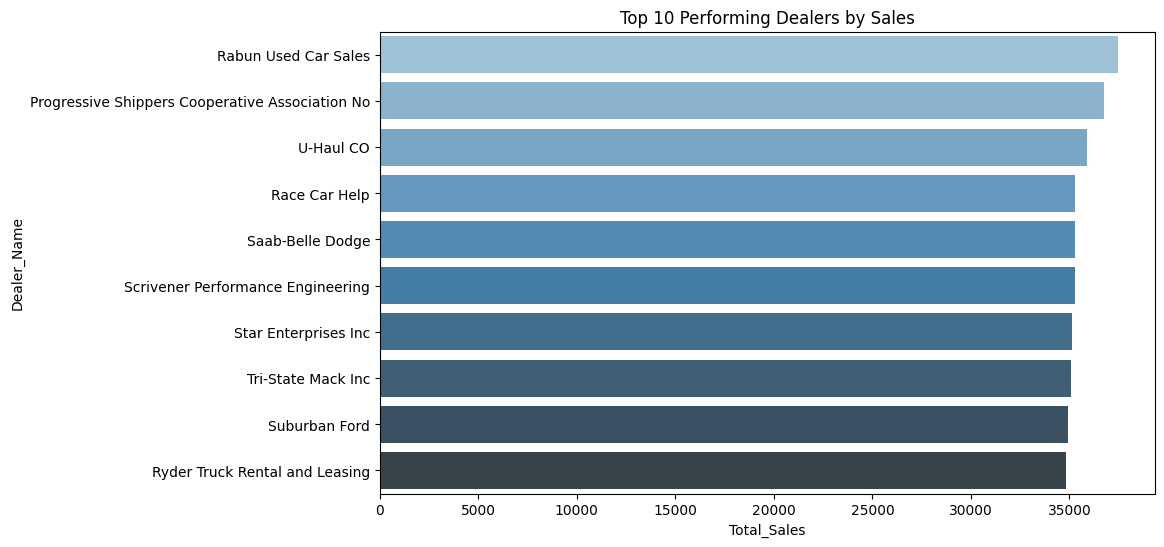

In [56]:
# Visualize top dealers
top_dealers = dealer_performance.sort_values('Total_Sales', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Sales', y='Dealer_Name', data=top_dealers, palette='Blues_d')
plt.title('Top 10 Performing Dealers by Sales')
plt.show()


In [6]:
# Group by region and visualize sales distribution
region_performance = df.groupby('Dealer_Region').agg(Total_Sales=('Price ($)', 'sum')).reset_index()

# Save for Power BI
region_performance.to_csv('region_performance.csv', index=False)


task 3

In [61]:
model_analysis = df.groupby(['Company', 'Model']).agg({
    'Car_id': 'count',
    'Price ($)': ['mean', 'median', 'std', 'min', 'max'],
}).reset_index()

model_analysis.columns = ['Company', 'Model', 'Sales_Volume', 'Avg_Price', 'Median_Price', 'Price_StdDev', 'Min_Price', 'Max_Price']

# Calculate total revenue for each model
model_analysis['Total_Revenue'] = model_analysis['Sales_Volume'] * model_analysis['Avg_Price']

# Estimate profitability (this is a simplified assumption, adjust as needed)
model_analysis['Estimated_Cost'] = model_analysis['Avg_Price'] * 0.7  # Assuming 30% profit margin
model_analysis['Estimated_Profit'] = model_analysis['Avg_Price'] - model_analysis['Estimated_Cost']
model_analysis['Total_Profit'] = model_analysis['Estimated_Profit'] * model_analysis['Sales_Volume']

# Calculate price elasticity (simplified version)
model_analysis['Price_Range'] = model_analysis['Max_Price'] - model_analysis['Min_Price']
model_analysis['Price_Elasticity'] = (model_analysis['Price_Range'] / model_analysis['Avg_Price']) / model_analysis['Sales_Volume']

# Rank models based on total profit
model_analysis = model_analysis.sort_values('Total_Profit', ascending=False).reset_index(drop=True)
model_analysis['Profit_Rank'] = model_analysis.index + 1

# Print top 10 most profitable models
print("Top 10 Most Profitable Car Models:")
print(model_analysis[['Profit_Rank', 'Company', 'Model', 'Sales_Volume', 'Avg_Price', 'Total_Revenue', 'Total_Profit']].head(10))

# Analyze price sensitivity
price_sensitive_models = model_analysis[model_analysis['Price_Elasticity'] > model_analysis['Price_Elasticity'].median()]
price_insensitive_models = model_analysis[model_analysis['Price_Elasticity'] <= model_analysis['Price_Elasticity'].median()]

print("\nPotential for Price Increase (Low Price Elasticity):")
print(price_insensitive_models[['Company', 'Model', 'Avg_Price', 'Sales_Volume', 'Price_Elasticity']].head())

print("\nPotential for Price Decrease or Promotion (High Price Elasticity):")
print(price_sensitive_models[['Company', 'Model', 'Avg_Price', 'Sales_Volume', 'Price_Elasticity']].head())

# Save data for Tableau
model_analysis.to_csv('model_pricing_profitability.csv', index=False)

# Generate some visualizations for quick insights
plt.figure(figsize=(12,6))
sns.scatterplot(data=model_analysis.head(20), x='Avg_Price', y='Sales_Volume', size='Total_Profit', hue='Company')
plt.title('Top 20 Models: Price vs Sales Volume')
plt.savefig('price_vs_volume_scatter.png')
plt.close()

plt.figure(figsize=(12,6))
sns.barplot(data=model_analysis.head(10), x='Model', y='Total_Profit', hue='Company')
plt.title('Top 10 Most Profitable Models')
plt.xticks(rotation=45)
plt.savefig('top_profitable_models.png')
plt.close()

Top 10 Most Profitable Car Models:
   Profit_Rank     Company          Model  Sales_Volume     Avg_Price  \
0            1       Lexus          LS400           354  40292.158192   
1            2  Volkswagen          Jetta           382  32166.848168   
2            3  Oldsmobile     Silhouette           411  29858.513382   
3            4  Mitsubishi  Montero Sport           302  37987.519868   
4            5       Dodge     Ram Pickup           383  27820.864230   
5            6    Cadillac       Eldorado           232  41919.857759   
6            7         BMW           528i           324  29561.503086   
7            8   Chevrolet          Prizm           411  22838.457421   
8            9  Mitsubishi       Diamante           418  22268.303828   
9           10    Chrysler            LHS           330  27568.839394   

   Total_Revenue  Total_Profit  
0     14263424.0     4279027.2  
1     12287736.0     3686320.8  
2     12271849.0     3681554.7  
3     11472231.0     3441669.

In [8]:
# Compare car models based on price and sales volume
model_pricing = df.groupby('Model').agg(
    Avg_Price=('Price ($)', 'mean'),
    Total_Sales=('Price ($)', 'sum'),
    Units_Sold=('Car_id', 'count')
).reset_index()

# Profitability analysis (assumes costs are available or you set a margin)
model_pricing['Profit_Margin'] = model_pricing['Avg_Price'] * 0.3  # Assuming 30% margin

# Save for Power BI
model_pricing.to_csv('model_pricing.csv', index=False)


In [ ]:
# Visualize models by price and sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Price', y='Total_Sales', size='Units_Sold', data=model_pricing, hue='Model', palette='coolwarm', sizes=(100, 1000))
plt.title('Car Models Pricing vs Sales Volume')
plt.show()
